# **Cài đặt pyspark**

In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 14.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612221 sha256=096b0bb247f3f27bcb99dd52e713a842e7411fdf99166cd89617de4d1617460a
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
#Tạo môi trường pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf


spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Bank_customer_churn')\
        .getOrCreate()
spark

# **Mô tả dữ liệu**

In [72]:
#Đọc dữ liệu
data = spark.read.csv('bankCustomerChurn_dataset.csv', header=True, inferSchema=True)
data.show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|     Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|     Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93

In [49]:
#Các cột của tập dữ liệu
data.columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

**Giải thích ý nghĩa các đặc trưng:**
* RowNumber: Số thứ tự của dòng dữ liệu.
* CustomerId: Mã số khách hàng.
* Surname: Họ của khách hàng.
* CreditScore: Điểm tín dụng của khách hàng.
* Geography: Quốc gia mà khách hàng đang sinh sống.
* Gender: Giới tính của khách hàng.
* Age: Tuổi của khách hàng.
* Tenure: Số năm khách hàng sử dụng dịch vụ của ngân hàng.
* Balance: Số dư tài khoản của khách hàng.
* NumOfProducts: Số lượng sản phẩm/dịch vụ mà khách hàng đang sử dụng tại ngân hàng.
* HasCrCard: Cho biết khách hàng có đang sở hữu thẻ tín dụng tại ngân hàng hay không.
* IsActiveMember: Cho biết khách hàng có đang là thành viên tích cực của ngân hàng hay không.
* EstimatedSalary: Ước tính thu nhập hàng năm của khách hàng.
* Exited: Cho biết khách hàng đã ngừng sử dụng dịch vụ của ngân hàng hay chưa (đã rời đi hoặc vẫn đang sử dụng).

In [50]:
#
data.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [51]:
data.describe().show()

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

# **Tiền xử lý dữ liệu**

In [73]:
#Kiểm tra dữ liệu null trên các cột
data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns]).show()
#Đếm giá trị khác  nhau trong các cột
data.select([countDistinct(c).alias(c) for c in data.columns]).show()

+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|Surname|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|        0|         0|      0|          0|        0|     0|  0|     0|      0|            0|        0|             0|              0|     0|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+

+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|Surname|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+-

In [74]:
'''
Chuyển đổi dữ liệu cột 'Gender':
1: male
0: female
'''

data = data.withColumn("Gender", when(col("Gender") == "Male", 1).when(col("Gender") == "Female", 0))
data.select("Gender").show(5)


+------+
|Gender|
+------+
|     0|
|     0|
|     0|
|     0|
|     0|
+------+
only showing top 5 rows



In [75]:
'''
Chuyển dổi dữ liệu cột 'Geography':
0: France
1: Germany
2: Spain
'''
data = data.withColumn("Geography", when(col("Geography") == "France", 0).when(col("Geography") == "Germany", 1).when(col("Geography") == "Spain", 2))
data.select("Geography").show(5)

+---------+
|Geography|
+---------+
|        0|
|        2|
|        0|
|        0|
|        2|
+---------+
only showing top 5 rows



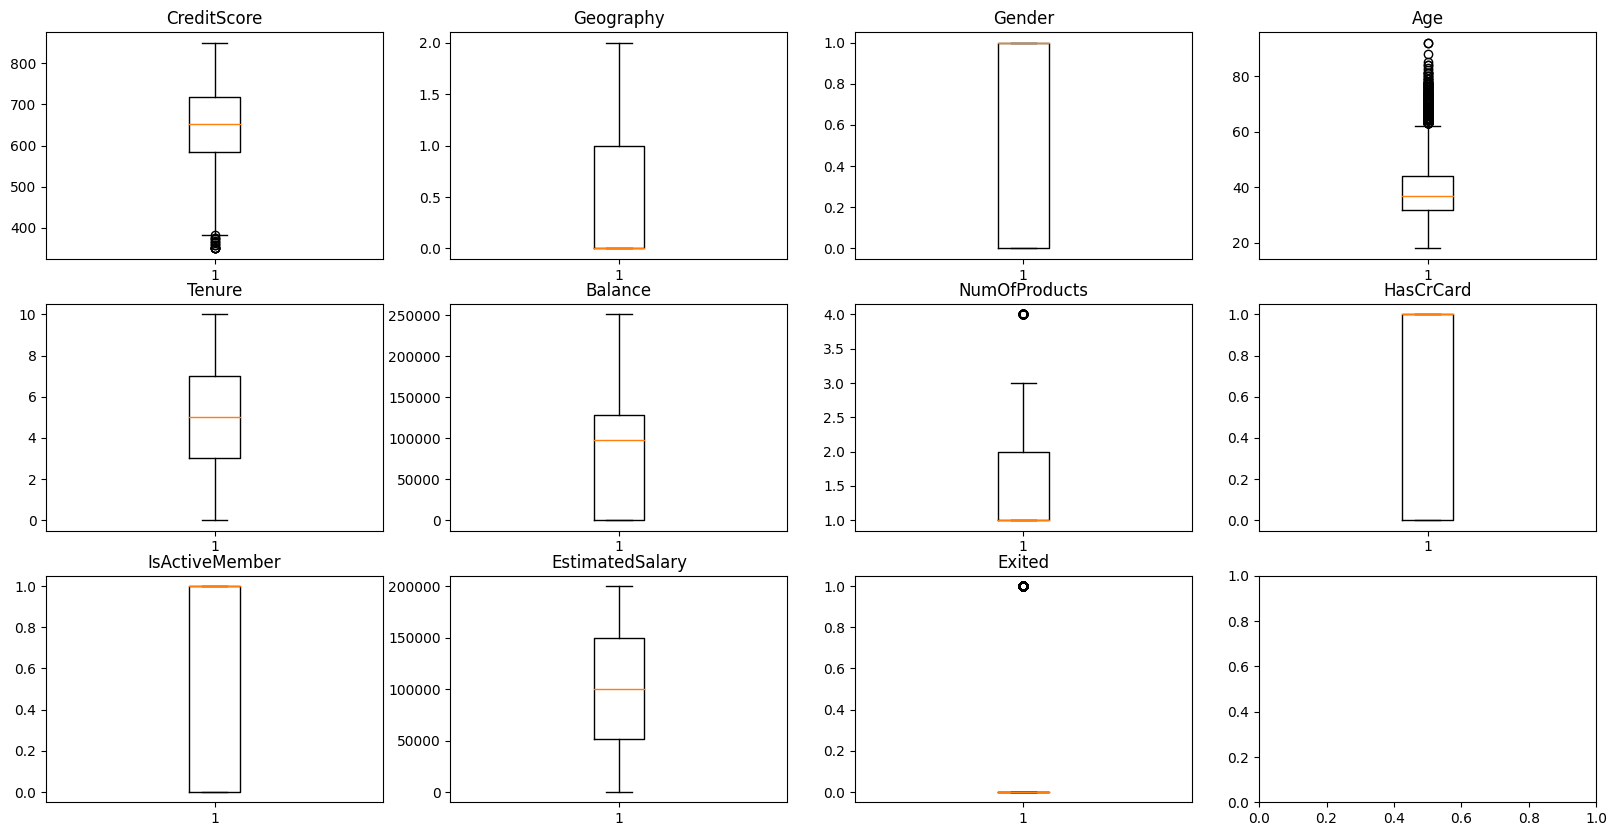

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

data_pandas = data.toPandas()
columns = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]
fig, axis = plt.subplots(3, 4, figsize=(20,10))
m = 0
n = 0
for i in columns:
  if m < 3 and n < 4:
    axis[m,n].boxplot(data_pandas[i])
    axis[m,n].set_title(i)
    n += 1
  else:
    m += 1
    n = 0
    axis[m,n].boxplot(data_pandas[i])
    axis[m,n].set_title(i)
    n += 1
plt.show()

In [77]:
def Zscore(column, data):
  stats = data.select(avg(col(column)).alias("mean"), stddev(col(column)).alias("stddev")).first()
  mean_value = stats['mean']
  stddev_value = stats['stddev']
  data = data.withColumn(f"{column}_ZScore", (col(column) - mean_value) / stddev_value)

  zscore_threshold = 3
  data = data.filter((col(f"{column}_ZScore") < zscore_threshold) & (col(f"{column}_ZScore") > -zscore_threshold))
  data = data.drop(f"{column}_ZScore")

  return data


In [78]:
data = Zscore("CreditScore", data)
data = Zscore("Age", data)

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|        0|     0| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|     Hill|        608|        2|     0| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|     Onio|        502|        0|     0| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|     Boni|        699|        0|     0| 39|     1|      0.0|            2|        0|             0|       93

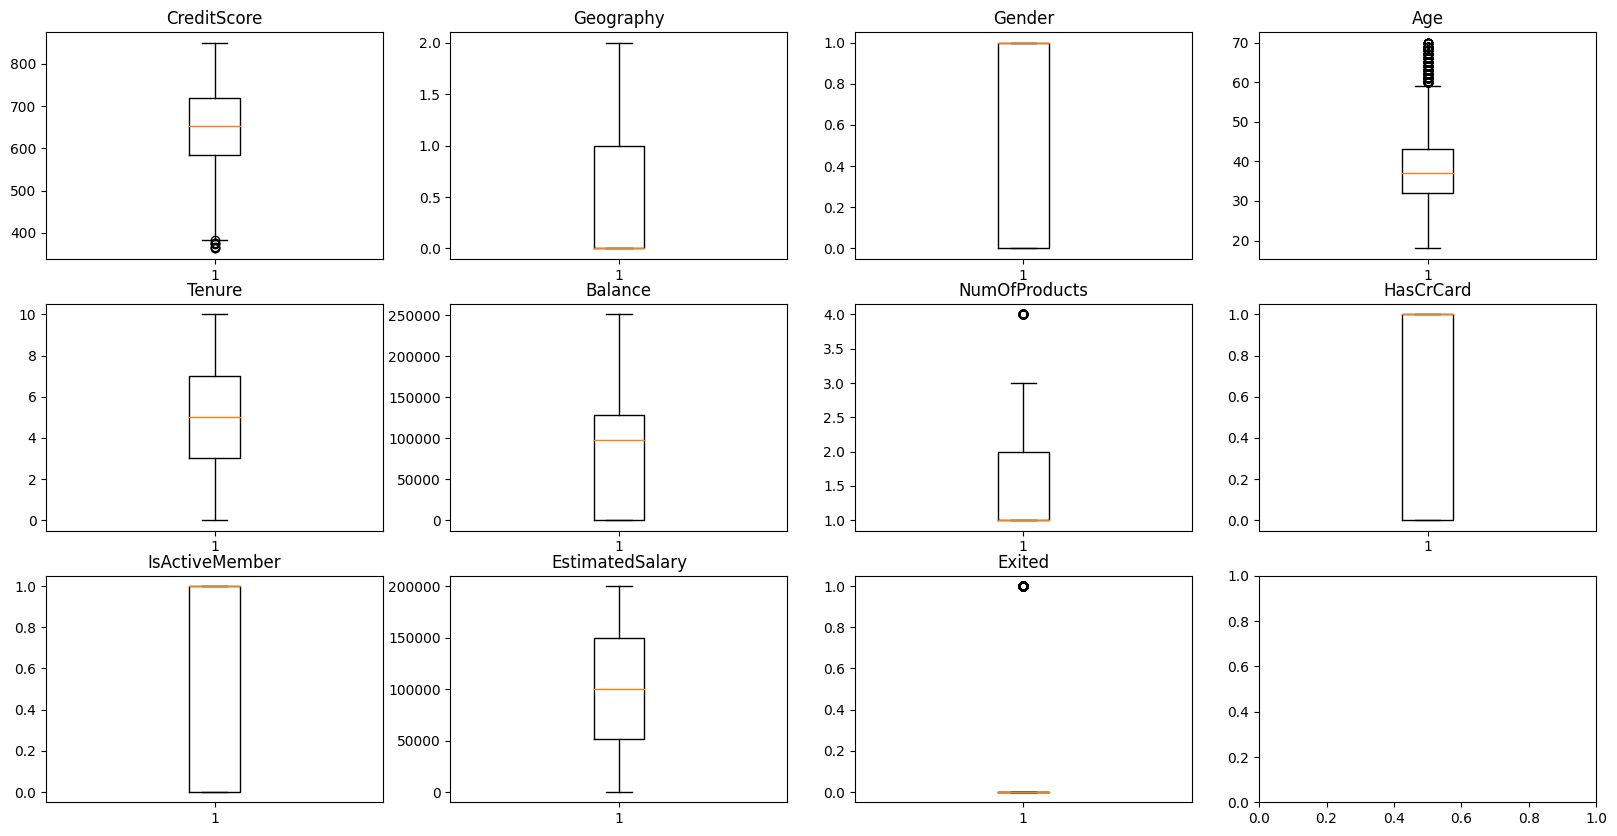

In [79]:
data_pandas = data.toPandas()
fig, axis = plt.subplots(3, 4, figsize=(20,10))
m = 0
n = 0
for i in columns:
  if m < 3 and n < 4:
    axis[m,n].boxplot(data_pandas[i])
    axis[m,n].set_title(i)
    n += 1
  else:
    m += 1
    n = 0
    axis[m,n].boxplot(data_pandas[i])
    axis[m,n].set_title(i)
    n += 1
plt.show()

In [80]:
#Tập dữ liệu sau khi tiền xử lý:
data.show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|        0|     0| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|     Hill|        608|        2|     0| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|     Onio|        502|        0|     0| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|     Boni|        699|        0|     0| 39|     1|      0.0|            2|        0|             0|       93

In [81]:
#Lưu tập dữ liệu đã tiền xử lý
data.write.csv('bankCustomerChurn_dataset_preprocessed.csv', header=True)

# **Phân tích dữ liệu**

In [62]:
import pandas as pd
#Chuyển đổi tập dữ liệu sang pandas để vẽ biểu đồ phân tích
data_pandas = data.toPandas()

In [36]:
#Đếm số khách hàng rời bỏ và ở lại theo quốc gia
count_Geography_1 = data_pandas['Geography'].where(data_pandas['Exited']==1).value_counts().sort_index()
count_Geography_0 = data_pandas['Geography'].where(data_pandas['Exited']==0).value_counts().sort_index()
ratio_Exited = count_Geography_1 / (count_Geography_0 + count_Geography_1)
#Tạo dataframe
df_Geography = pd.DataFrame({
                  'Geography': ['France','Germany','Spain'],
                  'count_Geography_1': count_Geography_1.values,
                  'count_Geography_0': count_Geography_0.values,
                  'ratio_Exited': ratio_Exited.values})
df_Geography

,Geography,count_Geography_1,count_Geography_0,ratio_Exited
0,France,802,4138,0.162348
1,Germany,808,1666,0.326597
2,Spain,408,2037,0.166871


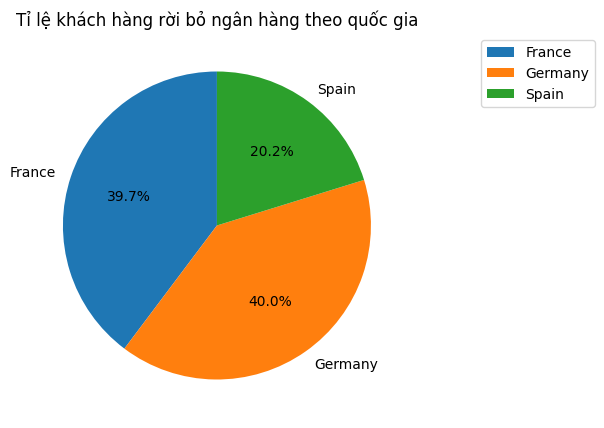

In [37]:
#Biểu đồ ti lệ rời bỏ ngân hàng theo quốc gia
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(df_Geography['count_Geography_1'], labels=df_Geography['Geography'], autopct='%1.1f%%', startangle=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('Tỉ lệ khách hàng rời bỏ ngân hàng theo quốc gia')
plt.show()

In [38]:
#Đếm số khách hàng theo độ tuổi
count_Age_1 = data_pandas['Age'].where(data_pandas['Exited']==1).value_counts().sort_index()
count_Age_0 = data_pandas['Age'].where(data_pandas['Exited']==0).value_counts().sort_index()
count_Age_0 = count_Age_0.reindex(count_Age_1.index, fill_value=0)
ratio_Exited = count_Age_1 / (count_Age_0 + count_Age_1)
#Tạo dataframe
df_Age = pd.DataFrame({
                  'Age': count_Age_1.index,
                  'count_Age_1': count_Age_1.values,
                  'count_Age_0': count_Age_0.values,
                  'ratio_Exited': ratio_Exited.values})
df_Age

,Age,count_Age_1,count_Age_0,ratio_Exited
0,18.0,2,20,0.090909
1,19.0,1,26,0.037037
2,20.0,2,38,0.050000
3,21.0,3,50,0.056604
4,22.0,12,72,0.142857
5,23.0,6,93,0.060606
6,24.0,14,118,0.106061
7,25.0,6,148,0.038961
8,26.0,14,186,0.070000
9,27.0,13,196,0.062201


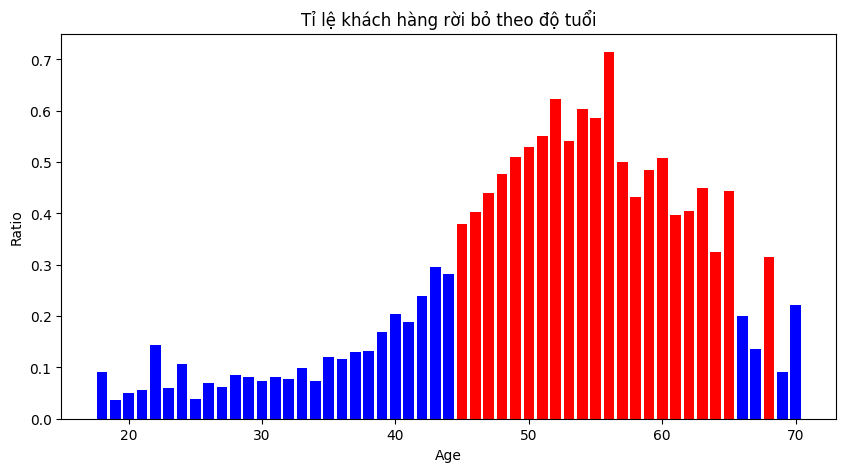

In [39]:
#Biểu đồ tỉ lệ khách hàng rời bỏ theo độ tuổi
fig, ax = plt.subplots(figsize=(10,5))
colors = ['blue' if val <= 0.3 else 'red' for val in df_Age['ratio_Exited']]
ax.bar(x=df_Age.Age,height=df_Age.ratio_Exited, color=colors )
ax.set_xlabel('Age')
ax.set_ylabel('Ratio')
plt.title('Tỉ lệ khách hàng rời bỏ theo độ tuổi')
plt.show()

In [40]:
#Điếm số khách hàng theo số sản phẩm sử dụng
count_NumOfProducts_1 = data_pandas['NumOfProducts'].where(data_pandas['Exited']==1).value_counts().sort_index()
count_NumOfProducts_0 = data_pandas['NumOfProducts'].where(data_pandas['Exited']==0).value_counts().sort_index()
count_NumOfProducts_0 = count_NumOfProducts_0.reindex(count_NumOfProducts_1.index, fill_value=0)
ratio_Exited = count_NumOfProducts_1 / (count_NumOfProducts_0 + count_NumOfProducts_1)
#Tạo dataframe
df_NumOfProducts = pd.DataFrame({
                  'NumOfProducts': count_NumOfProducts_1.index,
                  'count_NumOfProducts_1': count_NumOfProducts_1.values,
                  'count_NumOfProducts_0': count_NumOfProducts_0.values,
                  'ratio_Exited': ratio_Exited.values})
df_NumOfProducts

,NumOfProducts,count_NumOfProducts_1,count_NumOfProducts_0,ratio_Exited
0,1.0,1396,3615,0.278587
1,2.0,344,4181,0.076022
2,3.0,218,45,0.828897
3,4.0,60,0,1.000000


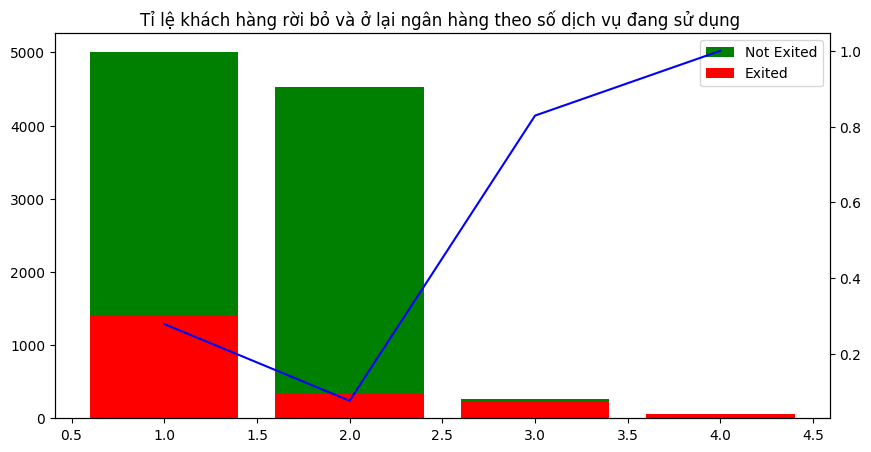

In [41]:

#Biểu đồ tỉ lệ khách hàng rời bỏ và ở lại ngân hàng theo số dịch vụ đang sử dụng
fig , ax = plt.subplots(figsize=(10,5))
ax.bar(df_NumOfProducts['NumOfProducts'],height=(df_NumOfProducts['count_NumOfProducts_0']+df_NumOfProducts['count_NumOfProducts_1']), label='Not Exited', color='green')
ax.bar(df_NumOfProducts['NumOfProducts'],height=df_NumOfProducts['count_NumOfProducts_1'], label='Exited', color='red')
ax2 = ax.twinx()
ax2.plot(df_NumOfProducts['NumOfProducts'], df_NumOfProducts['ratio_Exited'], label='Ratio', color='blue')
ax.legend()

plt.title('Tỉ lệ khách hàng rời bỏ và ở lại ngân hàng theo số dịch vụ đang sử dụng ')
plt.show()

In [42]:
#Đếm số khách hàng theo số năm sử dụng dịch vụ ngân hàng
count_Tenure_1 = data_pandas['Tenure'].where(data_pandas['Exited']==1).value_counts().sort_index()
count_Tenure_0 = data_pandas['Tenure'].where(data_pandas['Exited']==0).value_counts().sort_index()
count_Tenure_0 = count_Tenure_0.reindex(count_Tenure_1.index, fill_value=0)
ratio_Exited = count_Tenure_1 / (count_Tenure_0 + count_Tenure_1)
#Tạo dataframe
df_Tenure = pd.DataFrame({
                  'Tenure': count_Tenure_1.index,
                  'count_Tenure_1': count_Tenure_1.values,
                  'count_Tenure_0': count_Tenure_0.values,
                  'ratio_Exited': ratio_Exited.values})
df_Tenure

,Tenure,count_Tenure_1,count_Tenure_0,ratio_Exited
0,0.0,93,311,0.230198
1,1.0,231,792,0.225806
2,2.0,201,833,0.194391
3,3.0,211,784,0.212060
4,4.0,200,776,0.204918
5,5.0,208,786,0.209256
6,6.0,193,756,0.203372
7,7.0,176,845,0.172380
8,8.0,193,818,0.190900
9,9.0,213,760,0.218911


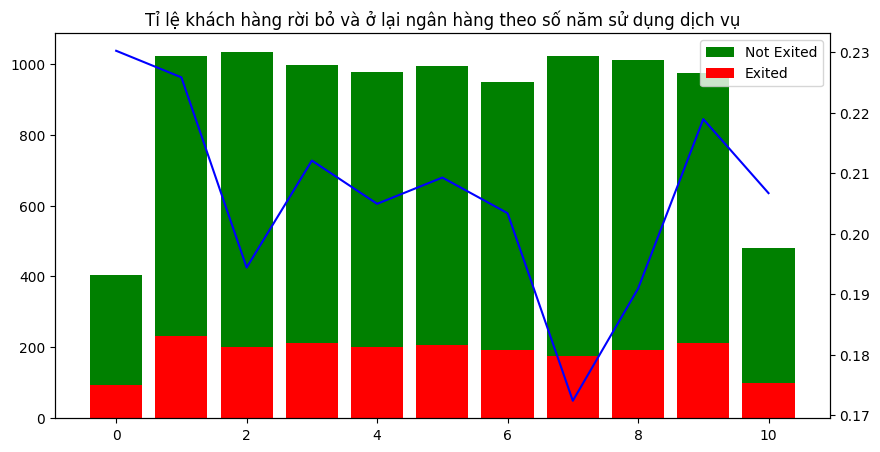

In [43]:
#Biểu đồ tỉ lệ khách hàng rời bỏ và ở lại ngân hàng theo số năm sử dụng dịch vụ
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=df_Tenure.Tenure,height=(df_Tenure.count_Tenure_0+df_Tenure.count_Tenure_1), label='Not Exited', color='green')
ax.bar(x=df_Tenure.Tenure,height=df_Tenure.count_Tenure_1, label='Exited', color='red')
ax2 = ax.twinx()
ax2.plot(df_Tenure.Tenure, df_Tenure.ratio_Exited, label='Ratio', color='blue')
ax.legend()

plt.title('Tỉ lệ khách hàng rời bỏ và ở lại ngân hàng theo số năm sử dụng dịch vụ')
plt.show()

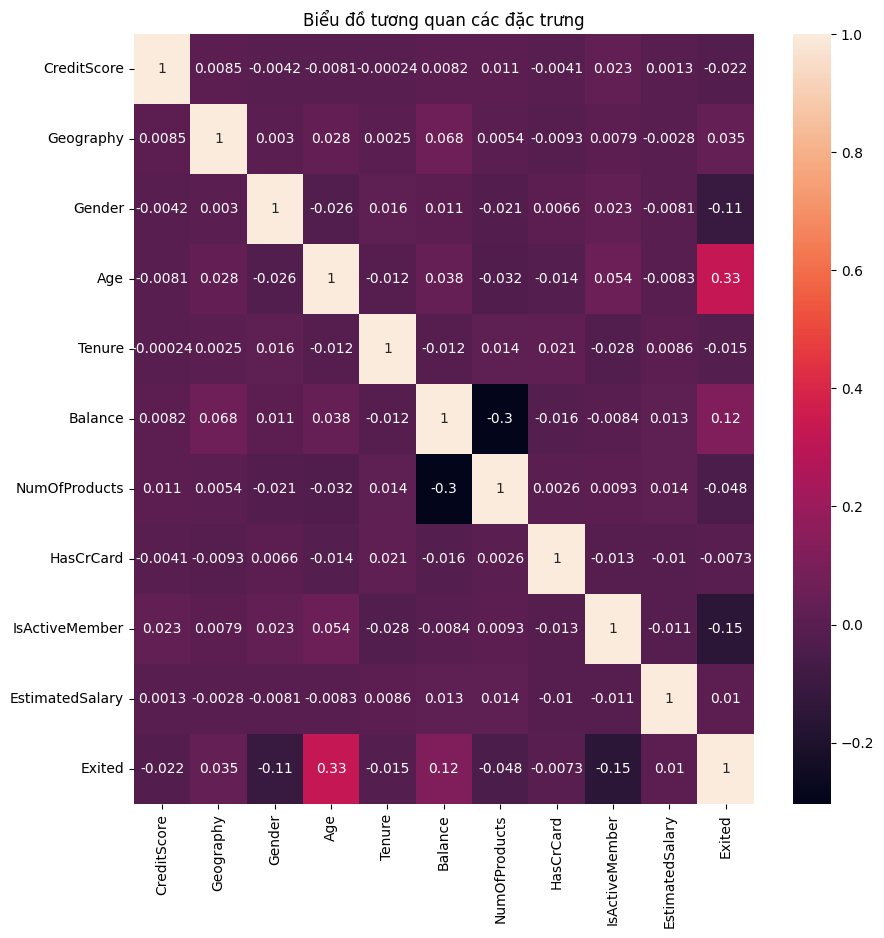

In [44]:
#Biểu đồ heatmap
fig, ax = plt.subplots(figsize=(10,10))
corr_matrix = data_pandas[columns].corr()
sns.heatmap(corr_matrix, annot=True,)
plt.title('Biểu đồ tương quan các đặc trưng')
plt.show()

# **Huấn luyện mô hình**

**Chia tập dữ liệu huấn luyện mô hình**

In [108]:
data = spark.read.csv('bankCustomerChurn_dataset_preprocessed.csv', header=True, inferSchema=True)
data.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|        0|     0| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|        2|     0| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|        0|     0| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|        0|     0| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [109]:
#Xoá các cột không cần thiết
data = data.drop("RowNumber")
data = data.drop("CustomerId")
data = data.drop("Surname")

In [148]:
from pyspark.ml.feature import VectorAssembler

features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
target = "Exited"

assemble = VectorAssembler(inputCols=features, outputCol='standardized')
scaled_data = assemble.transform(data)


In [131]:
scaled_data.show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|        standardized|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------------------+
|        619|        0|     0| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|[619.0,0.0,0.0,42...|
|        608|        2|     0| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|[608.0,2.0,0.0,41...|
|        502|        0|     0| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|[502.0,0.0,0.0,42...|
|        699|        0|     0| 39|     1|      0.0|            2|        0|             0|       93826.63|     0|(10,[0,3,4,6,9],[...|
|        850|        2|     0| 43|     2|125510.82|    

In [113]:
# Chia tập dữ liệu
train, test = scaled_data.randomSplit([0.8, 0.2], seed=42)


In [140]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# RandomForestClassifier
rf = RandomForestClassifier(featuresCol='standardized', labelCol='Exited')
rf_model = rf.fit(train)
rf_predictions = rf_model.transform(test)

# DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol='standardized', labelCol='Exited')
dt_model = dt.fit(train)
dt_predictions = dt_model.transform(test)

# LogisticRegression
lr = LogisticRegression(featuresCol='standardized', labelCol='Exited', maxIter=10)
lr_model = lr.fit(train)
lr_predictions = lr_model.transform(test)

# Đánh giá các mô hình
evaluator = BinaryClassificationEvaluator(labelCol="Exited", rawPredictionCol="prediction")
accuracy_rf = evaluator.evaluate(rf_predictions)
accuracy_dt = evaluator.evaluate(dt_predictions)
accuracy_lr = evaluator.evaluate(lr_predictions)
print("RandomForestClassifier Accuracy: ", accuracy_rf)
print("DecisionTreeClassifier Accuracy: ", accuracy_dt)
print("LogisticRegression Accuracy: ", accuracy_lr)



RandomForestClassifier Accuracy:  0.6718920280467995
DecisionTreeClassifier Accuracy:  0.6576801417418899
LogisticRegression Accuracy:  0.5933094126758922


**Tìm tham số tốt nhất**

In [141]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
cv_model = cv.fit(train)
best_model = cv_model.bestModel
print("Best model: ", best_model)

Best model:  RandomForestClassificationModel: uid=RandomForestClassifier_64b94d6b42c3, numTrees=50, numClasses=2, numFeatures=10


In [142]:
# RandomForestClassifier

best_rf_predictions = best_model.transform(test)
best_accuracy = evaluator.evaluate(best_rf_predictions)
print("Best RandomForestClassifier Accuracy: ", best_accuracy)

Best RandomForestClassifier Accuracy:  0.6975604699141187


**Đánh giá mô hình**

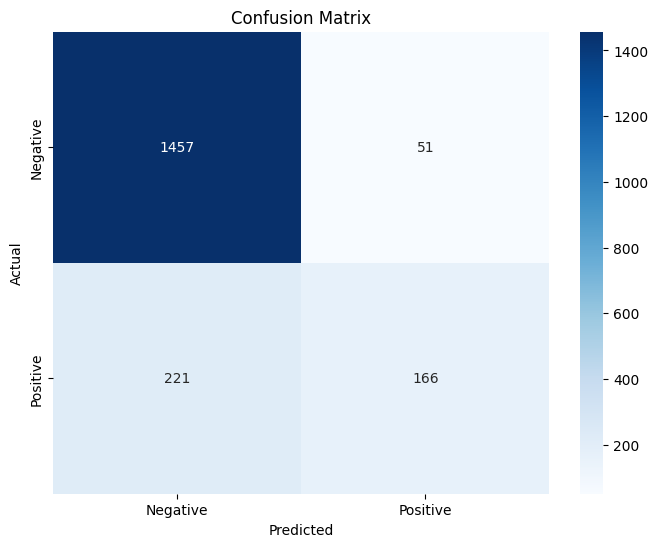

In [143]:
from sklearn.metrics import confusion_matrix
# Tính toán ma trận nhầm lẫn
y_true = best_rf_predictions.select('Exited').collect()
y_pred = best_rf_predictions.select('prediction').collect()
cm = confusion_matrix(y_true, y_pred)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

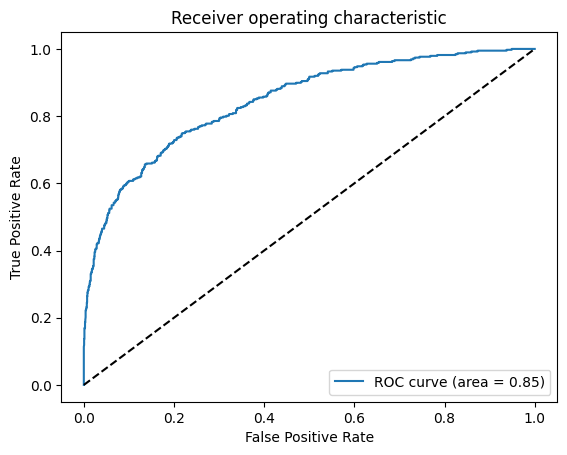

In [147]:
#Vẽ biểu đồ ROC

from sklearn.metrics import roc_curve
# Tính toán AUC
evaluator = BinaryClassificationEvaluator(rawPredictionCol="probability", labelCol="Exited")
auc = evaluator.evaluate(best_rf_predictions, {evaluator.metricName: "areaUnderROC"})

# Chuẩn bị dữ liệu cho sklearn
y_true = best_rf_predictions.select('Exited').toPandas()['Exited'].values
y_score = best_rf_predictions.select('probability').toPandas()['probability'].apply(lambda x: x[1]).values

# Tính toán FPR, TPR
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# Vẽ đường cong ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Đường chéo
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()